In [1]:
with open('Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

In [2]:
words_list = [doc.strip().split() for doc in texts]
# 각 문서를 단어들의 리스트 형태로 표현

In [3]:
print(words_list[:2])

[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍']]


빈도를 기준으로 상위 K 개의 단어 선택하기

In [4]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [5]:
from collections import Counter
c = Counter(total_words)

In [6]:
print(c)

Counter({'영화': 73347, '너무': 22800, '봤': 17603, '좋': 16880, '진짜': 16306, '정말': 12277, '보고': 11747, '연기': 11095, '평점': 9738, '스토리': 9447, '배우': 8790, '이': 8760, '점': 8418, '보는': 8283, '감동': 8078, '했': 7756, '시간': 7727, '돈': 7692, '사람': 7265, '그냥': 7140, '본': 7107, '더': 6831, '입니': 6742, '였': 6726, '것': 6586, '이런': 6406, '봐': 6215, '재미': 6133, '하는': 6096, '최고': 5994, '아니': 5900, '내용': 5895, '재미없': 5826, '왜': 5817, '볼': 5557, '감독': 5232, '생각': 5076, '없는': 5062, '말': 5027, '알': 4912, '잘': 4838, '노잼': 4791, '아깝': 4732, '내': 4611, '처음': 4494, '최악': 4341, '할': 4297, '기대': 4266, '없고': 4263, '좀': 4250, '나': 4158, '좀비': 4145, '정도': 4117, '꼭': 4035, '거': 4009, '재밌게': 3998, '그': 3994, '있는': 3968, '알바': 3944, '모르': 3942, '수': 3920, '역시': 3916, '같은': 3839, '하나': 3731, '잼': 3715, '때': 3641, '보면': 3597, '뭐': 3488, '느낌': 3445, '별로': 3442, '완전': 3416, '임': 3399, '마지막': 3374, '재밌었': 3353, '장면': 3263, '개': 3242, '아이': 3232, '없다': 3207, '한': 3187, '들': 3176, '없': 3155, '분': 3090, '안': 2997, '와': 2980, '중간':

In [7]:
len(c)

52011

In [8]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [9]:
len(common_words)

10000

In [10]:
words_dic ={}
# 각 단어에 대해서 index 생성하기
for index, word in enumerate(common_words):
    words_dic[word]=index+1
    # 각 단어의 index는 1부터 시작
    # 0은 패딩을 위해 사용하지 않음

In [11]:
print(words_dic)

{'영화': 1, '너무': 2, '봤': 3, '좋': 4, '진짜': 5, '정말': 6, '보고': 7, '연기': 8, '평점': 9, '스토리': 10, '배우': 11, '이': 12, '점': 13, '보는': 14, '감동': 15, '했': 16, '시간': 17, '돈': 18, '사람': 19, '그냥': 20, '본': 21, '더': 22, '입니': 23, '였': 24, '것': 25, '이런': 26, '봐': 27, '재미': 28, '하는': 29, '최고': 30, '아니': 31, '내용': 32, '재미없': 33, '왜': 34, '볼': 35, '감독': 36, '생각': 37, '없는': 38, '말': 39, '알': 40, '잘': 41, '노잼': 42, '아깝': 43, '내': 44, '처음': 45, '최악': 46, '할': 47, '기대': 48, '없고': 49, '좀': 50, '나': 51, '좀비': 52, '정도': 53, '꼭': 54, '거': 55, '재밌게': 56, '그': 57, '있는': 58, '알바': 59, '모르': 60, '수': 61, '역시': 62, '같은': 63, '하나': 64, '잼': 65, '때': 66, '보면': 67, '뭐': 68, '느낌': 69, '별로': 70, '완전': 71, '임': 72, '마지막': 73, '재밌었': 74, '장면': 75, '개': 76, '아이': 77, '없다': 78, '한': 79, '들': 80, '없': 81, '분': 82, '안': 83, '와': 84, '중간': 85, '넘': 86, '재밌어': 87, '또': 88, '보세': 89, '끝': 90, '이건': 91, '보다': 92, '다시': 93, '걸': 94, '듯': 95, '보기': 96, '쓰레기': 97, '보지': 98, '액션': 99, '왔': 100, '함': 101, '한번': 102, '같아': 103, '눈물': 104

In [12]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [16]:
max_len = 40

In [17]:
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [18]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 204, 249, 121,   2, 345,
         3])

In [19]:
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(labels)

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.1)

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [22]:
model = models.Sequential()
model.add(layers.Embedding(max_features+1, 32)) # +1 을 하는 이유 => index 번호 0이 포함되었기 때문
model.add(layers.GRU(32))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320032    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 326,434
Trainable params: 326,434
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint_filepath = './temp/checkpoint_gru_kr'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [24]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[es, mc])

Epoch 1/20
1047/1047 [==============================] - 23s 20ms/step - loss: 0.3073 - accuracy: 0.8675 - val_loss: 0.2568 - val_accuracy: 0.8943
Epoch 2/20
1047/1047 [==============================] - 18s 17ms/step - loss: 0.2383 - accuracy: 0.9032 - val_loss: 0.2472 - val_accuracy: 0.8999
Epoch 3/20
1047/1047 [==============================] - 19s 18ms/step - loss: 0.2230 - accuracy: 0.9111 - val_loss: 0.2403 - val_accuracy: 0.9029
Epoch 4/20
1047/1047 [==============================] - 18s 18ms/step - loss: 0.2125 - accuracy: 0.9151 - val_loss: 0.2356 - val_accuracy: 0.9038
Epoch 5/20
1047/1047 [==============================] - 18s 18ms/step - loss: 0.2040 - accuracy: 0.9186 - val_loss: 0.2341 - val_accuracy: 0.9055
Epoch 6/20
1047/1047 [==============================] - 18s 18ms/step - loss: 0.1967 - accuracy: 0.9224 - val_loss: 0.2337 - val_accuracy: 0.9060
Epoch 7/20
1047/1047 [==============================] - 18s 18ms/step - loss: 0.1907 - accuracy: 0.9247 - val_loss: 0.2316 -

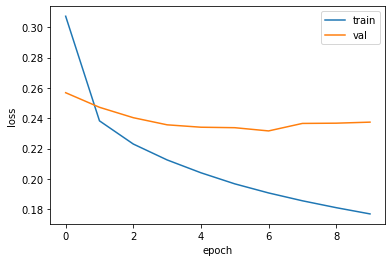

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
model.load_weights(checkpoint_filepath)

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

517/517 [==============================] - 2s 4ms/step - loss: 0.2188 - accuracy: 0.9128
test_acc: 0.9127516746520996
